---
# 데이터 가져오기

In [117]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = (12, 6)



# DB가져오기
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
df123.fillna(0, inplace=True)
df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True) # trash 데이터

pd.set_option('display.max_rows', 100) # row 100개까지 출력
pd.set_option('display.max_columns', 100) # col 100개까지 출력

zero_index = df123[df123['내용(타이틀)'].values==0].index # 내용이 없는 rows는 제거

df123.drop(zero_index,axis=0,inplace=True)

print(df123.shape) # 총 2122개의 DB를 쌓음.
display(df123.head())

(2122, 9)


,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


In [118]:
print(df123.columns)

Index(['기수', '주차', '서비스/브랜드명', '산업', '내용(타이틀)', '마케팅 유형/방식', '마케팅 채널', 'SUM',
       '힙마비 원칙/HIP POINT'],
      dtype='object')


In [157]:
def freq_col(x): # 컬럼 별 빈도 계산하는 함수
    df_sp_col = df123[x].str.split(',') 
    df_sp_col = df_sp_col.apply(lambda x : pd.Series(x))
    df_sp_col.stack(level=0)
    df_sp_col = df_sp_col.stack().reset_index(level=1,drop=True).to_frame(x)
    df_sp_col = df_sp_col[x].str.strip()
    sp_col = df_sp_col.value_counts().to_frame()
    sp_col = sp_col.reset_index()
    sp_col.rename(columns={'index':x,x:'개수'},inplace=True)
    return sp_col


def bar(col_name):
    plt.xticks(rotation = 45)
    ax = sns.barplot(x=col_name.columns[0], y="개수", data=col_name.head(10))

industry = freq_col('산업')
brand = freq_col('서비스/브랜드명')
marketing = freq_col('마케팅 유형/방식')
channel = freq_col('마케팅 채널')
hip_point = freq_col('힙마비 원칙/HIP POINT') # 다 채우지 못해서 통계로 사용하기에는 조금 애매함.

---
# 가장 많이 언급된 00은?

,산업,개수
0,식음료(F&B),353
1,의류/패션,203
2,생활/라이프스타일,181
3,플랫폼/APP서비스,174
4,IT,144


,서비스/브랜드명,개수
0,배달의민족,41
1,토스,31
2,넷플릭스,28
3,당근마켓,25
4,오늘의집,19


,마케팅 유형/방식,개수
0,콘텐츠 마케팅,387
1,이벤트/프로모션,290
2,동영상 광고,278
3,콜라보레이션,201
4,브랜디드콘텐츠,154


,마케팅 채널,개수
0,인스타그램,617
1,유튜브,537
2,자사 홈페이지,340
3,자사 APP,318
4,오프라인,166


,힙마비 원칙/HIP POINT,개수
0,우리만의 가치에 집중하는 브랜딩&아이덴티티가 뚜렷해,238
1,타겟을 잘 고려한 마케팅,206
2,바이럴 요소를 적절히 이용,138
3,유저와 진심으로 소통하는 찐팬만들기,86
4,고정관념을 깬다&사고의 전환,59


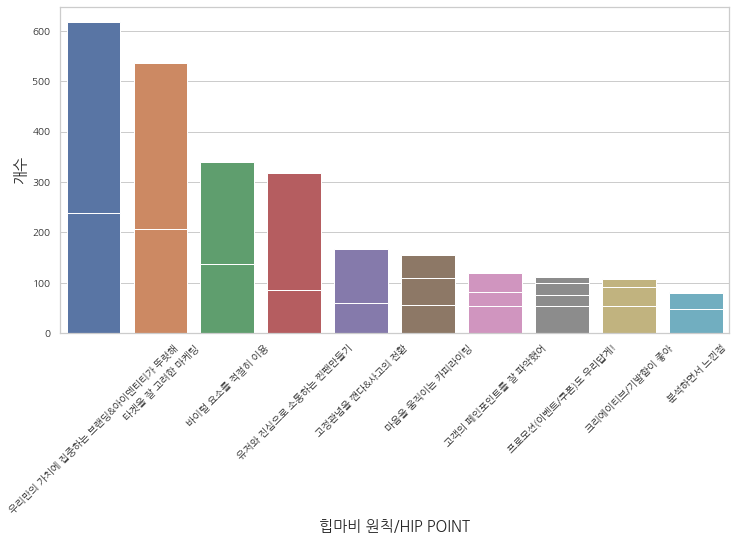

In [120]:
bar(industry) # 산업
display(industry.head())

bar(brand) # 브랜드
display(brand.head())

bar(marketing) # 마케팅 유형
display(marketing.head())

bar(channel) # 매체
display(channel.head())

bar(hip_point) # 힙포인트
display(hip_point.head())

---
# Top N 00을 가장 잘 활용한 다른 요소

In [238]:
df123.head()

,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


In [242]:
## 특정 태그를 입력한 서비스/브랜드 순위

In [303]:
# cols = [industry, brand, marketing, channel, hip_point] # 컬럼 리스트
def find_brand(x,y):
    col_top = x[x.columns[0]][y] # 컬럼 빈도가 가장 높은 것
    print(col_top)
    print(col_top,'태그 언급 횟수',x['개수'][y])
    print('총 컬럼의 수', len(x)) # 산업, 브랜드, 마케팅유형, 매체, 힙포인트
    print('총 태그 수',x['개수'].nunique())
    print('총 DB 수', x['개수'].unique().sum())
    df_sp_col = df123[df123[x.columns[0]]==col_top]
    brand = pd.DataFrame(df_sp_col['서비스/브랜드명'].value_counts()).reset_index().head(10) # 해당 태그를 입력한 브랜드 순위 나열
    return brand

find_brand(hip_point,0) # x = col에서 y = 몇번째 순위 -1

우리만의 가치에 집중하는 브랜딩&아이덴티티가 뚜렷해
우리만의 가치에 집중하는 브랜딩&아이덴티티가 뚜렷해 태그 언급 횟수 238
총 컬럼의 수 78
총 태그 수 38
총 DB 수 1486


,index,서비스/브랜드명
0,배달의민족,3
1,올버즈,2
2,볼보,2
3,오호라,2
4,이케아,2
5,KREAM,1
6,국립중앙박물관,1
7,채널톡,1
8,캐치볼 스니커즈,1
9,파파야플러스,1


## 산업과 마케팅유형

In [17]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 100)
# col 생략 없이 출력
pd.set_option('display.max_columns', 100)

display(df123.head())
df123.columns

,기수,주차,서비스/브랜드명,산업,내용(타이틀),마케팅 유형/방식,마케팅 채널,SUM,힙마비 원칙/HIP POINT
0,1기,7주차,왈도,콘텐츠,"마케팅 이야기, 왈도",콘텐츠 마케팅,유튜브,0.0,제품에 관련된 다양한 콘텐츠 생성
1,1기,7주차,탬버린즈,뷰티,"세심 끝판왕, 탬버린즈","공간 마케팅, 기타",오프라인매장,0.0,오프라인 공간에 브랜드의 가치를 담아 표현
2,1기,7주차,카카오페이지,콘텐츠,할아버지가 70살에 발레에 도전하게 된다면??,브랜디드콘텐츠,유튜브,0.0,이런 유튜버와 콜라보 어때요?
3,1기,7주차,대동여주도,주류,예쁜 술이 마시기도 좋다 - 대동여주도 연희로제,바이럴 캠페인,인스타그램,0.0,"제품에 관련된 다양한 콘텐츠 생성, 제품의 특성에 맞춘 마케팅"
4,1기,7주차,마이리얼트립,여행/숙박,마이리얼트립의 몬트리안 특별 프로모션,이벤트/프로모션,자사 APP,0.0,프로모션(이벤트/쿠폰)도 우리답게!


Index(['기수', '주차', '서비스/브랜드명', '산업', '내용(타이틀)', '마케팅 유형/방식', '마케팅 채널', 'SUM',
       '힙마비 원칙/HIP POINT'],
      dtype='object')

In [10]:
df_ch_top10 = df123[df123['마케팅 채널'].isin(channel_top10)]


NameError: name 'channel_top10' is not defined

In [ ]:
zero_index = df_ch_top10[df_ch_top10['내용(타이틀)'].values==0].index

df_ch_top10.drop(zero_index,axis=0,inplace=True)

df_ch_top10.shape

df_ch_top10_brand = df_ch_top10['서비스/브랜드명'].str.split(',')
# df123_industry
df_ch_top10_brand = df_ch_top10_brand.apply(lambda x : pd.Series(x))
df_ch_top10_brand
df_ch_top10_brand.stack(level=0)
df_ch_top10_brand = df_ch_top10_brand.stack().reset_index(level=1,drop=True).to_frame('서비스/브랜드명')
df_ch_top10_brand = df_ch_top10_brand['서비스/브랜드명'].str.strip()
ch_top10_brand = df_ch_top10_brand.value_counts().to_frame()
ch_top10_brand.head(10)
# df123_industry.sort_values
# df123_industry = df123.merge(df123_industry, left_index=True, right_index=True, how='left')
# df123_industry.head(40)

ch_top10_brand = ch_top10_brand.reset_index()
ch_top10_brand.rename(columns={'index':'서비스/브랜드명','서비스/브랜드명':'개수'},inplace=True)

ch_top10_brand

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# print(dir(sns))
SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(rotation = 45 )
plt.rcParams['figure.figsize'] = (20, 12)
ax = sns.barplot(x="서비스/브랜드명", y="개수", data=ch_top10_brand.head(10))


---
## TOP10 매체와 산업

In [ ]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

# row 생략 없이 출력
pd.set_option('display.max_rows', 100)
# col 생략 없이 출력
pd.set_option('display.max_columns', 100)

display(df123.head())
df123.columns

In [ ]:
df_ch_top10 = df123[df123['마케팅 채널'].isin(channel_top10)]


In [ ]:
zero_index = df_ch_top10[df_ch_top10['내용(타이틀)'].values==0].index

df_ch_top10.drop(zero_index,axis=0,inplace=True)

df_ch_top10.shape

df_ch_top10_brand = df_ch_top10['산업'].str.split(',')
# df123_industry
df_ch_top10_brand = df_ch_top10_brand.apply(lambda x : pd.Series(x))
df_ch_top10_brand
df_ch_top10_brand.stack(level=0)
df_ch_top10_brand = df_ch_top10_brand.stack().reset_index(level=1,drop=True).to_frame('산업')
df_ch_top10_brand = df_ch_top10_brand['산업'].str.strip()
ch_top10_brand = df_ch_top10_brand.value_counts().to_frame()
ch_top10_brand.head(10)
# df123_industry.sort_values
# df123_industry = df123.merge(df123_industry, left_index=True, right_index=True, how='left')
# df123_industry.head(40)

ch_top10_brand = ch_top10_brand.reset_index()
ch_top10_brand.rename(columns={'index':'산업','산업':'개수'},inplace=True)

ch_top10_brand

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# print(dir(sns))
SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(rotation = 45 )
plt.rcParams['figure.figsize'] = (20, 12)
ax = sns.barplot(x="산업", y="개수", data=ch_top10_brand.head(10))


---
## TOP10 매체와 마케팅 유형

In [ ]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

# row 생략 없이 출력
pd.set_option('display.max_rows', 100)
# col 생략 없이 출력
pd.set_option('display.max_columns', 100)

display(df123.head())
df123.columns

In [ ]:
df_ch_top10 = df123[df123['마케팅 채널'].isin(channel_top10)]


In [ ]:
zero_index = df_ch_top10[df_ch_top10['내용(타이틀)'].values==0].index

df_ch_top10.drop(zero_index,axis=0,inplace=True)

df_ch_top10.shape

df_ch_top10_brand = df_ch_top10['마케팅 유형/방식'].str.split(',')
# df123_industry
df_ch_top10_brand = df_ch_top10_brand.apply(lambda x : pd.Series(x))
df_ch_top10_brand
df_ch_top10_brand.stack(level=0)
df_ch_top10_brand = df_ch_top10_brand.stack().reset_index(level=1,drop=True).to_frame('마케팅 유형/방식')
df_ch_top10_brand = df_ch_top10_brand['마케팅 유형/방식'].str.strip()
ch_top10_brand = df_ch_top10_brand.value_counts().to_frame()
ch_top10_brand.head(10)
# df123_industry.sort_values
# df123_industry = df123.merge(df123_industry, left_index=True, right_index=True, how='left')
# df123_industry.head(40)

ch_top10_brand = ch_top10_brand.reset_index()
ch_top10_brand.rename(columns={'index':'마케팅 유형/방식','마케팅 유형/방식':'개수'},inplace=True)

ch_top10_brand

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# print(dir(sns))
SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(rotation = 45 )
plt.rcParams['figure.figsize'] = (20, 12)
ax = sns.barplot(x="마케팅 유형/방식", y="개수", data=ch_top10_brand.head(10))


---
## TOP10매체와 힙포인트

In [ ]:
import pandas as pd
df1 = pd.read_csv('힙슐랭1기DB.csv', encoding='utf-8-sig')
df2 = pd.read_csv('힙슐랭2기DB.csv', encoding='utf-8-sig')
df3 = pd.read_csv('힙슐랭3기DB.csv', encoding='utf-8-sig')
df123 = pd.concat([df1,df2,df3])
# df123.columns
# help(df.drop)
# df1.shape
# df1 = df.drop_duplicates(['서비스/브랜드명'])
# df1.shape

df123.columns
df123.fillna(0, inplace=True)

df123.drop(['PICK','선정사례','마비(사례를 올려주신)','분석','임팩트(영향력)','선정 판단 지표','찜','계','Property'],axis=1, inplace=True)

# row 생략 없이 출력
pd.set_option('display.max_rows', 100)
# col 생략 없이 출력
pd.set_option('display.max_columns', 100)

display(df123.head())
df123.columns

In [ ]:
df_ch_top10 = df123[df123['마케팅 채널'].isin(channel_top10)]


In [ ]:
zero_index = df_ch_top10[df_ch_top10['내용(타이틀)'].values==0].index

df_ch_top10.drop(zero_index,axis=0,inplace=True)

df_ch_top10.shape

df_ch_top10_brand = df_ch_top10['힙마비 원칙/HIP POINT'].str.split(',')
# df123_industry
df_ch_top10_brand = df_ch_top10_brand.apply(lambda x : pd.Series(x))
df_ch_top10_brand
df_ch_top10_brand.stack(level=0)
df_ch_top10_brand = df_ch_top10_brand.stack().reset_index(level=1,drop=True).to_frame('힙마비 원칙/HIP POINT')
df_ch_top10_brand = df_ch_top10_brand['힙마비 원칙/HIP POINT'].str.strip()
ch_top10_brand = df_ch_top10_brand.value_counts().to_frame()
ch_top10_brand.head(10)
# df123_industry.sort_values
# df123_industry = df123.merge(df123_industry, left_index=True, right_index=True, how='left')
# df123_industry.head(40)

ch_top10_brand = ch_top10_brand.reset_index()
ch_top10_brand.rename(columns={'index':'힙마비 원칙/HIP POINT','힙마비 원칙/HIP POINT':'개수'},inplace=True)

ch_top10_brand

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# print(dir(sns))
SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(rotation = 45 )
plt.rcParams['figure.figsize'] = (20, 12)
ax = sns.barplot(x="힙마비 원칙/HIP POINT", y="개수", data=ch_top10_brand.head(10))
